<a href="https://colab.research.google.com/github/Rakeshscode/Data-Science/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, elpd_loo it is only relevant when its used relatively to another model.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model learns the training data too well and ends up being distracted by unnecessary data. This makes it perform poorly on unseen data.

**Task3**:

How do we mitigate overfitting?

We can minimize the risk of overfitting by limiting the model to the essential variables needed for prediction, avoiding unnecessary ones that might distract from the relevant patterns. Using weakly informative priors can also help constrain the model and prevent it from overfitting the data.

**Task4**:

How do we mitigate underfitting?

We can address underfitting by using elpd_loo. This method helps identify how well the model generalizes by testing its performance across different subsets of the data. By selecting the model with the highest elpd_loo value, we ensure it captures the underlying patterns in the data without being overly simplistic, reducing the risk of underfitting.

**Task5**:

Why would we want more than one predictor in a model?

Including multiple predictors in a model can improve its accuracy because many outcomes depend on various factors. For example, when predicting academic performance, using hours spent studying as a predictor is helpful, but adding a predictor for sleep quality can make the model more accurate, as both factors influence performance. This is especially true when the predictors are not strongly correlated with each other but each contributes independently to the outcome, such as students who study a lot but get poor sleep or vice versa, both affecting their grades. Incorporating diverse predictors allows the model to capture a fuller picture of the factors at play.

**Task6**:

Can we have too many predictors? How would we now?

Yes, having too many predictors can be problematic. It often results in overfitting, where the model captures noise in the training data rather than general patterns. For example, if we were predicting house prices and included a predictor like the color of the front door, it would likely be unnecessary because it doesn’t logically influence price. Including irrelevant predictors like this can make the model overly complex and less effective at predicting new data.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of deciding which predictors to include in a model to optimize its performance. For instance, when predicting house prices, we might consider variables like square footage, location, and number of bedrooms. However, including too many predictors, like the color of the house or the owner's name, could lead to overfitting. On the other hand, leaving out an important variable, like neighborhood crime rates, might result in underfitting and inaccurate predictions. Variable selection helps us choose the right mix of predictors to create a model that is both accurate and generalizable.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

In the first option, the model assumes the same slope for all categories of the categorical variable, but the intercepts may differ, resulting in parallel lines for each category. The second option allows for different slopes across categories, enabling the model to capture varying relationships between the continuous predictor and the categorical variable. The third option, similar to the second, incorporates an interaction term, which allows the model to account for how the effect of the continuous variable changes depending on the category, revealing more nuanced patterns in the data.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can't visualize the entire multiple linear regression model in a single graph because there are too many predictors and predicted values to represent in a limited number of dimensions. For example, if we are predicting house prices using square footage and the number of bedrooms, we can visualize the relationship between square footage and price by fixing the number of bedrooms at a constant value. This allows us to see how price changes with square footage while holding the other predictor constant. Additionally, posterior predictive checks and elpd_loo plots are helpful for comparing different models but are less effective for visualizing the model's overall structure on their own.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
ft_pos_categorical = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
ft_pos_hier = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
ft_pos_inter_ft_perc = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
ft_pos_3pt_inter_pred = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
ft_pos_3pt_inter_pred2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

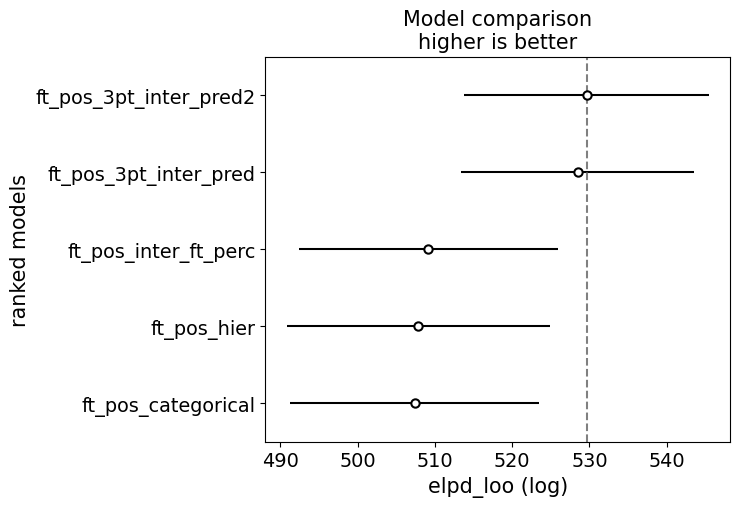

In [ ]:
compare = az.compare({"ft_pos_categorical":ft_pos_categorical, "ft_pos_hier":ft_pos_hier, "ft_pos_inter_ft_perc":ft_pos_inter_ft_perc, "ft_pos_3pt_inter_pred":ft_pos_3pt_inter_pred, "ft_pos_3pt_inter_pred2":ft_pos_3pt_inter_pred2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The model "ft_pos_3pt_inter_pred2" is the best according to the elpd_loo metric because it achieves the highest predictive accuracy with lower uncertainty compared to the others. Models incorporating three-point attempts (3PA) perform better than those without, likely because 3PA serves as a strong predictor of overall shooting ability, including free throws. The top model, which includes only interactions between 3PA and position, likely outperforms the more complex model with interactions among all three predictors due to its better balance of predictive power and simplicity.